# Limpieza de Datos Dataset ProvProdu-20190712

In [1]:
import pandas as pd
from utils_functions import  upload_to_bucket
import matplotlib.pyplot as plt
import seaborn as sns

# Importar Dataset

#### Importar el dataset y observar los primeros registros con head y verificar los tipos de datos con el método info.

In [2]:
prov_prod_col_names = [
    'id_proveedor', 'razon_social', 'id_sector', 'desc_sector', 'id_seccion',
    'desc_seccion', 'id_gran_flia', 'desc_gran_flia', 'id_flia', 'desc_flia',
    'id_sub_flia', 'desc_sub_flia', 'id_articulo', 'id_producto',
    'desc_producto', 'id_region', 'fecha'
]

In [3]:
prov_prod_df = pd.read_csv("../data/VMI_ProvProdu-20190712.txt",
                           encoding="UTF-8",
                           encoding_errors='replace',
                           header=None,
                           delimiter='\t',
                           names=prov_prod_col_names)

In [5]:
prov_prod_df.head()

,id_proveedor,razon_social,id_sector,desc_sector,id_seccion,desc_seccion,id_gran_flia,desc_gran_flia,id_flia,desc_flia,id_sub_flia,desc_sub_flia,id_articulo,id_producto,desc_producto,id_region,fecha
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27003,273920,REFILL CITRICO OIL ESCENCE AIR WICK CITRICOS ...,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27004,273921,FRESHMATIC AIRWICK LAVANDA REPUESTO 250.00 MLT,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27005,284012,AIR WICK CITRICO FULL REP.GRATIS AIR WICK AIR ...,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27012,359572,MAGNOLIA Y CHERRY AIR WICK REPUESTO 175.00 GR,1,2019-07-12 11:04:07.967
1,252,Reckitt Benckiser Argentina S.A.,1,Almac�n,4,Limpieza,3,Ba�o y Hogar,4,Desodorantes de ambientes,1,Desodorantes en aerosol,27007,415268,FRESHMATIC BOSQUE M�GICO APARATO AIR WICK LUSH...,1,2019-07-12 11:04:07.967


In [6]:
prov_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 1
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_proveedor    82 non-null     int64 
 1   razon_social    82 non-null     object
 2   id_sector       82 non-null     int64 
 3   desc_sector     82 non-null     object
 4   id_seccion      82 non-null     int64 
 5   desc_seccion    82 non-null     object
 6   id_gran_flia    82 non-null     int64 
 7   desc_gran_flia  82 non-null     object
 8   id_flia         82 non-null     int64 
 9   desc_flia       82 non-null     object
 10  id_sub_flia     82 non-null     int64 
 11  desc_sub_flia   82 non-null     object
 12  id_articulo     82 non-null     int64 
 13  id_producto     82 non-null     int64 
 14  desc_producto   82 non-null     object
 15  id_region       82 non-null     int64 
 16  fecha           82 non-null     object
dtypes: int64(9), object(8)
memory usage: 11.5+ KB


#### Observaciones Iniciales
- El dataset contiene 82 registros que contienen la relacion entre la descripcion del producto, la familia, subfamilia y gran familia, asi mismo contiene el nombre del proveedor de los productos.
- Vamos a revisar las diferents categorias de las variables tipo object que se encuentran en el dataset para identificar los tipos de categoria presentes en el dataset.

In [7]:
columnas_categoricas = ['razon_social', 'desc_sector', 'desc_seccion', 'desc_gran_flia', 'desc_flia', 'desc_sub_flia', 'desc_producto']

In [8]:
# Conteo de los niveles en las diferentes columnas categóricas
for col in columnas_categoricas:
    print(f"Columna {col}: {prov_prod_df[col].nunique()} subnivele(s)")

Columna razon_social: 4 subnivele(s)
Columna desc_sector: 1 subnivele(s)
Columna desc_seccion: 1 subnivele(s)
Columna desc_gran_flia: 1 subnivele(s)
Columna desc_flia: 1 subnivele(s)
Columna desc_sub_flia: 1 subnivele(s)
Columna desc_producto: 81 subnivele(s)


In [9]:
grouped_data = prov_prod_df.groupby(['razon_social']).id_producto.count()
print(f"Total de productos suministrados por los cuatro principales proveedores: \n {grouped_data}")

Total de productos suministrados por los cuatro principales proveedores: 
 razon_social
Clorox argentina s.a.               21
Industrias iberia s.a.i.c.           1
Reckitt Benckiser Argentina S.A.    10
S. c. johnson y son de arg. s.a.    50
Name: id_producto, dtype: int64


In [10]:
grouped_data_by_flia = prov_prod_df.groupby(['desc_sector', 'desc_seccion', 'desc_gran_flia', 'desc_flia', 'desc_sub_flia']).id_producto.count()
print(f"Agrupacion de prooductos por gran familia, familia y subfamilia: \n{grouped_data_by_flia}")

Agrupacion de prooductos por gran familia, familia y subfamilia: 
desc_sector  desc_seccion  desc_gran_flia  desc_flia                  desc_sub_flia          
Almac�n      Limpieza      Ba�o y Hogar    Desodorantes de ambientes  Desodorantes en aerosol    82
Name: id_producto, dtype: int64


Podemos concluir que existen 82 únicos productos en el dataset y cuatro proveedores principales que los suministran, los productos principalment corresponden a productos de la categoria desodorantes en aerosol perteneciente a la familia de desodorantes de ambientes clasificados en productos de Limpieza para el baño y hogar.

Para el objetivo de este análisis hemos concluido que vamos a tomar de este dataset unicamente las columnas de razon social, id del proveedor, id del producto y descripción del producto.  Las demás columnas se van  a eliminar del dataset.

In [11]:
# Eliminar del dataset las columnas que no son relevantes para el análisis.
prov_prod_df.drop(['id_sector', 'desc_sector', 'id_seccion', 'desc_seccion', 'id_gran_flia', 'desc_gran_flia', 'id_flia', 'desc_flia', 'id_sub_flia', 'desc_sub_flia', 'id_articulo', 'fecha'], axis=1, inplace=True)

In [12]:
prov_prod_df = prov_prod_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [13]:
prov_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 1
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_proveedor   82 non-null     int64 
 1   razon_social   82 non-null     object
 2   id_producto    82 non-null     int64 
 3   desc_producto  82 non-null     object
 4   id_region      82 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ KB


In [14]:
print(prov_prod_df.id_producto.nunique())

82


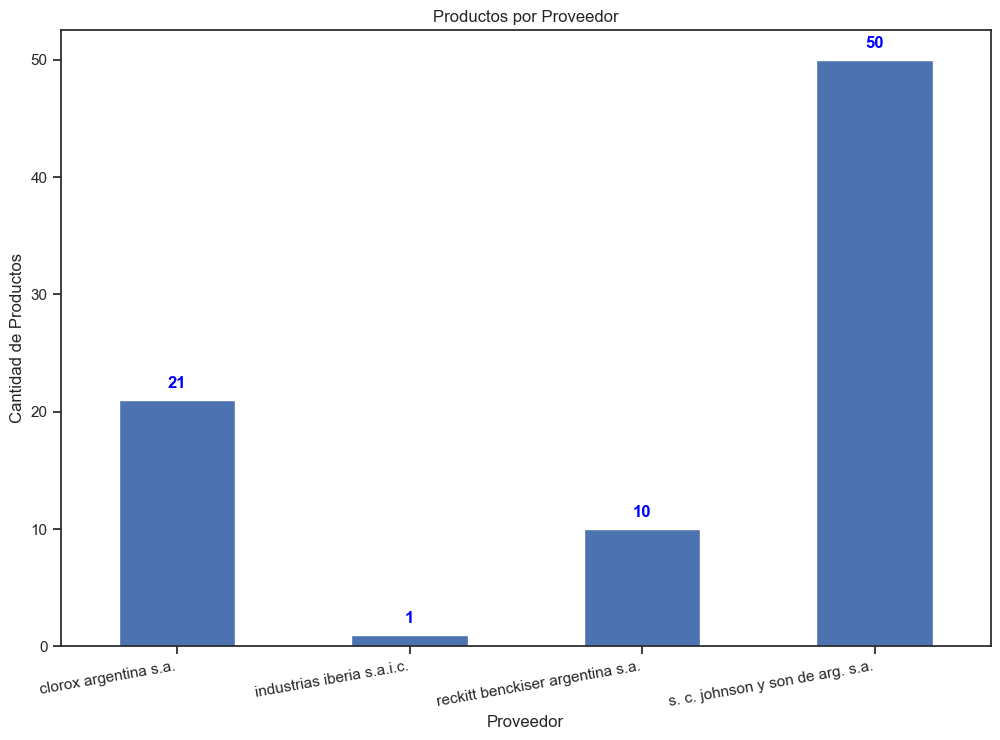

In [15]:
# set the seaborn theme
sns.set_theme(style="ticks")

plt.figure(figsize=(12, 8))

# create a bar chart of the grouped data
grouped_data = prov_prod_df.groupby(['razon_social']).id_producto.count()
ax = grouped_data.plot(kind='bar')

# set chart labels and title
ax.set_xlabel('Proveedor')
ax.set_ylabel('Cantidad de Productos')
ax.set_title('Productos por Proveedor')

# add labels to the bars
for i, v in enumerate(grouped_data):
    ax.text(i, v + 1, str(v), color='blue', fontweight='bold', ha='center')

# rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right')

# save the chart as a PNG image
plt.savefig('productos_por_proveedor.png')

# display the chart
plt.show()


#### Guardar el dataset limpio

In [ ]:
prov_prod_df.to_csv('../clean_data/prov_prod_clean.csv', index=False)

#### Subir csv a google cloud storage

In [ ]:
upload_to_bucket('deodorants', '../clean_data/prov_prod_clean.csv', 'prov_prod')